# Experience-Based Salary Estimator
A predictive model that analyzes and estimates salary based on years of experience using `Linear Regression.`

## Step 1 Import all requred libraries

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Step 2: Load the DataSet and perform Basic EDA + Preprocessing

In [161]:
df = pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [162]:
df.describe().T       #return the mean, standard derivation, quantile, percentile, deciles of the numerical columns

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [163]:
df.info()         # return all the information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [164]:
df.shape         # shape attribute tell the dimension of the dataset

(30, 3)

In [165]:
df.isna().sum()       # check the null values

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

#### Remove unnacessary columns

In [166]:
# Drop unnamed 0 (not useful for prediction)
# axis=1 means drop column-wise
# inplace=True to modify a DataFrame directly instead of creating a new copy.
df.drop("Unnamed: 0", axis = 1, inplace = True )

## Step 3: Distribution plot and check the outliers in salary

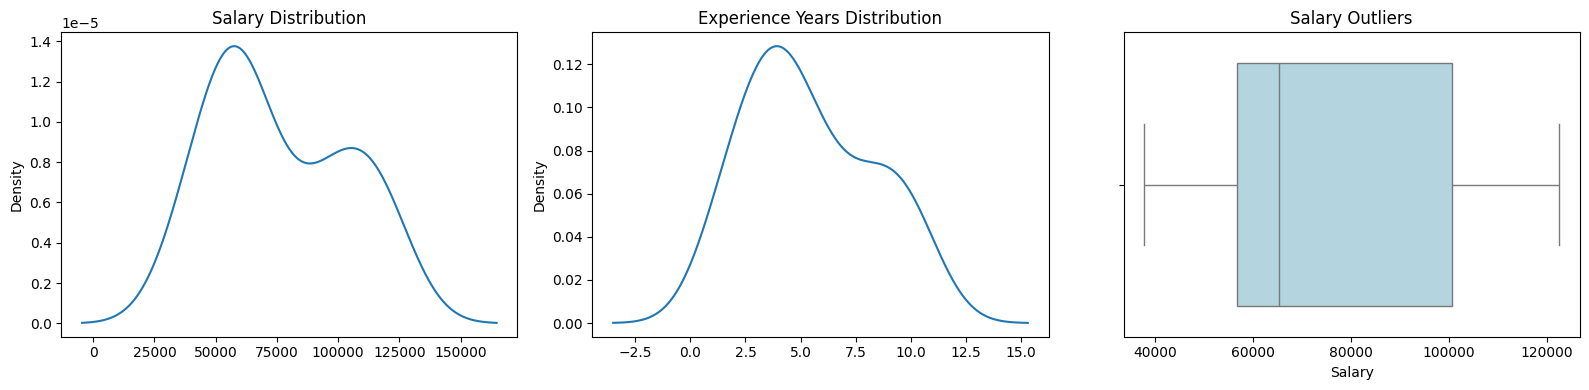

In [167]:
# Create subplots (1 row, 3 columns)
fig, axis = plt.subplots(1, 3, figsize=(16, 4))

# KDE Plot for Salary
df["Salary"].plot(kind="kde", title="Salary Distribution", ax=axis[0])

# KDE Plot for Experience
df["YearsExperience"].plot(kind="kde", title="Experience Years Distribution", ax = axis[1])

# Boxplot to Check Outliers in Salary
axis[2].set_title("Salary Outliers")
sns.boxplot(x=df["Salary"], color="lightblue", ax = axis[2])

plt.tight_layout()
plt.show()


## Step 4: Split data into 80% training, 20% testing

In [168]:
X = df.drop("Salary", axis=1)       #Feature
Y = df["Salary"]                    #Target Variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)



Skip the step in which we convert the type of variables and reshape the variables because we use linear regression model can handle pandas Dataframe.

## Step 5: Train the model


In [169]:
# create an object
lr = LinearRegression()

#Train the model
lr.fit(x_train, y_train)


LinearRegression()

## Step 6: Predict and Evaluate

In [170]:
# predict 
y_pred = lr.predict(x_test)

#Evaluate
r2 =  r2_score(y_test, y_pred)        # we also lr.score(x_test, y_test) that predict the y_predict on the x_test internally
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: ", r2)
print("Mean Square Error: ",mse)

R2 Score:  0.9024461774180498
Mean Square Error:  49830096.855908334


## Step 7: Predict the salary on unseen (new input) Data (Experience)

In [180]:
new_data = 1.3

# Convert to DataFrame beacuse during training the model we train on the DataFrame 
x = pd.DataFrame([new_data], columns=["YearsExperience"])

#Predict
salary_pred = lr.predict(x)
print(f"Predict salary for {new_data} experience ", salary_pred)

Predict salary for 1.3 experience  [36631.16139941]


## Step 7: Find the slope and y_intercept
slop shows how much y (Salary) increase when x (Experience) increases by 1 unit
we use this in the linear equation to predict the y on the new x input but in this project their is no need to manually find the slope and intercept to predict the y because lr.fit() and lr.predict() method calculate the slope and intercept internally.


In [172]:
m = lr.coef_              #slope
c = lr.intercept_         # intercept

x = 1.3
y = m * x + c

y

array([36631.16139941])

same result as the lr.predict() method return

## Step 8: Regression line on the actual training value

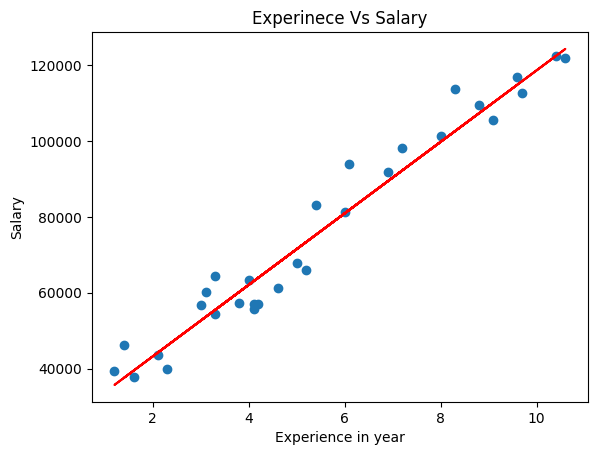

In [173]:
plt.scatter(df["YearsExperience"], df["Salary"])

# Regression line
plt.plot(x_train, lr.predict(x_train), color = "red")

plt.title("Experinece Vs Salary")
plt.xlabel("Experience in year")
plt.ylabel("Salary")
plt.show()